In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('nhgis0001_ts_nominal_state.csv')
df

,GISJOIN,YEAR,STATE,STATEFP,STATENH,NAME,A00AA
0,G090,1790,Connecticut,9.0,90,Connecticut,237655
1,G100,1790,Delaware,10.0,100,Delaware,59096
2,G130,1790,Georgia,13.0,130,Georgia,82548
3,G240,1790,Maryland,24.0,240,Maryland,319728
4,G250,1790,Massachusetts,25.0,250,Massachusetts,475199
...,...,...,...,...,...,...,...
977,G530,2010,Washington,53.0,530,Washington,6724540
978,G540,2010,West Virginia,54.0,540,West Virginia,1852994
979,G550,2010,Wisconsin,55.0,550,Wisconsin,5686986
980,G560,2010,Wyoming,56.0,560,Wyoming,563626


In [5]:
pd.set_option('display.max_rows', 100)
df['STATE'].unique()

array(['Connecticut', 'Delaware', 'Georgia', 'Maryland', 'Massachusetts',
       'New Hampshire', 'New Jersey', 'New York', 'North Carolina',
       'Pennsylvania', 'Rhode Island', 'South Carolina',
       'Southwest Territory', 'Vermont', 'Virginia',
       'District Of Columbia', 'Indiana Territory', 'Kentucky',
       'Mississippi Territory', 'Northwest Territory', 'Tennessee',
       'Illinois Territory', 'Louisiana Territory', 'Michigan Territory',
       'Ohio', 'Orleans Territory', 'Alabama', 'Arkansas Territory',
       'Illinois', 'Indiana', 'Louisiana', 'Maine', 'Mississippi',
       'Missouri Territory', 'Florida Territory', 'Missouri', 'Arkansas',
       'Iowa Territory', 'Michigan', 'Wisconsin Territory', 'California',
       'Florida', 'Iowa', 'Minnesota Territory', 'New Mexico Territory',
       'Oregon Territory', 'Texas', 'Utah Territory', 'Wisconsin',
       'Colorado Territory', 'Dakota Territory', 'Kansas Territory',
       'Minnesota', 'Nebraska Territory', 'Nevada

In [6]:
# Use the above to curate a list of ONLY states (i.e. entities with senators)
states = ['Connecticut', 'Delaware', 'Georgia', 'Maryland', 'Massachusetts',
          'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania',
          'Rhode Island', 'South Carolina', 'Vermont', 'Virginia', 'Kentucky',
          'Tennessee', 'Ohio', 'Alabama', 'Illinois', 'Indiana',
          'Louisiana', 'Maine', 'Mississippi', 'Missouri', 'Arkansas',
          'Michigan', 'California', 'Florida', 'Iowa', 'Texas',
          'Wisconsin', 'Minnesota', 'Oregon', 'Kansas', 'Nebraska',
          'Nevada', 'West Virginia', 'Colorado', 'Idaho', 'Montana',
          'North Dakota', 'South Dakota', 'Washington', 'Wyoming', 'Utah',
          'Oklahoma', 'Arizona', 'New Mexico', 'Alaska', 'Hawaii']

In [14]:
# Gini coefficient calculator by Olivia Guest, https://github.com/oliviaguest/gini
# with one line of code added by DSL to handle pd.Series inputs instead of np.array

import numpy as np

def gini(series):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # First convert to numpy array
    array = series.to_numpy('float64')
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

YEAR
1790    0.387279
1800    0.378588
1810    0.361355
1820    0.430336
1830    0.420529
1840    0.406180
1850    0.440809
1860    0.420319
1870    0.446376
1880    0.420085
1890    0.461598
1900    0.467038
1910    0.448378
1920    0.466000
1930    0.479257
1940    0.477264
1950    0.481720
1960    0.505883
1970    0.510427
1980    0.496700
1990    0.504603
2000    0.502912
2010    0.502940
Name: A00AA, dtype: float64

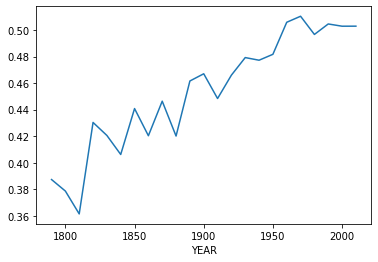

In [17]:
inequality = df[df['STATE'].isin(states)].groupby('YEAR')['A00AA'].apply(gini)

inequality.plot()
inequality